# Build the following network:

* That takes a CIFAR10 image (32x32x3)

  > Add 3 Convolutions to arrive at AxAx48 dimensions (e.g. 32x32x3 | 3x3x3x16 >> 3x3x16x32 >> 3x3x32x48)

  > Apply GAP and get 1x1x48, call this X

* Create a block called ULTIMUS that:

  > Creates 3 FC layers called K, Q and V such that:

         X*K = 48*48x8 > 8

         X*Q = 48*48x8 > 8 

         X*V = 48*48x8 > 8 

         then create AM = SoftMax(QTK)/(8^0.5) = 8*8 = 8

         then Z = V*AM = 8*8 > 8

         then another FC layer called Out that:

         Z*Out = 8*8x48 > 48

* Repeat this Ultimus block 4 times

* Then add final FC layer that converts 48 to 10 and sends it to the loss function.

* Model would look like this C>C>C>U>U>U>U>FFC>Loss

* Train the model for 24 epochs using the OCP, Use ADAM as an optimizer. 

* FC Layer 


* SoftMax





1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being cloned here to be able to run the main.py script with various user provided (or default) arg options.







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Feb 24 12:31:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    52W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##  Install the EVA8 packages, hosted @ github

In [2]:
!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-d_ujx27p
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-d_ujx27p
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit 34f34c5f8775138d27832138ef9fb2e2810e7bd8
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=27639 sha256=fa85d9da0b3216cedfa4a7b77c32c5943b3c81a9341f3b7bd2fae12d3a9d34d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1aak600/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [3]:

!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [4]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:

!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=c6ba90c8746a0d219e04d465b01e0b8e22258605f4724eb1600614aaccda5a91
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [6]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 418 (delta 19), reused 11 (delta 11), pack-reused 388
Receiving objects: 100% (418/418), 194.35 KiB | 2.86 MiB/s, done.
Resolving deltas: 100% (266/266), done.


In [7]:
%cd EVA8_API




/content/EVA8_API


In [8]:
%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test







CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 1e-05
	end_lr : 1.0
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


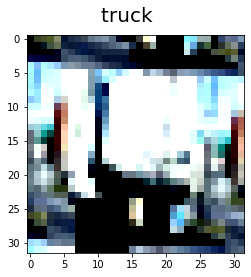

Here are a few samples BEFORE TRANSFORMS APPLIED:


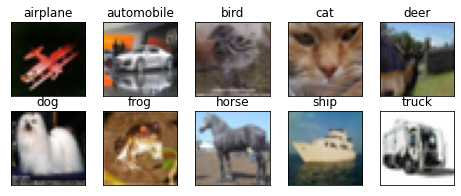

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
              ReLU-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
           Dropout-7           [-1, 32, 32, 32]               0
              ReLU-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]          13,824
      BatchNorm2d-10           [-1, 48, 32, 32]              96
          Dropout-11           [-1, 48, 32, 32]               0
             ReLU-12           [-1, 48, 32, 32]               0
        AvgPool2d-13             [-1, 48, 1, 1]               0
           Linear-14              

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.6664484343268837 to be used: 0.596047538592714
LR suggestion: steepest gradient
Suggested LR: 1.51E-01


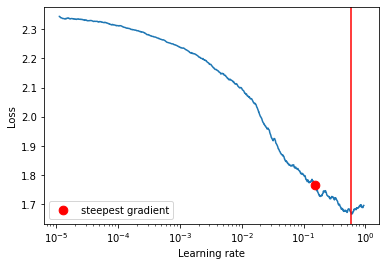

best_lr is 0.596047538592714


<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 1e-5 --end_lr 1 --lr_range_test_epochs 10

### With the best_lr found from above "lr_find" run, model is trained by running the main.py script under "train" command



CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.151
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


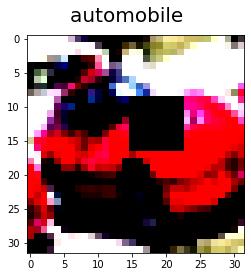

Here are a few samples BEFORE TRANSFORMS APPLIED:


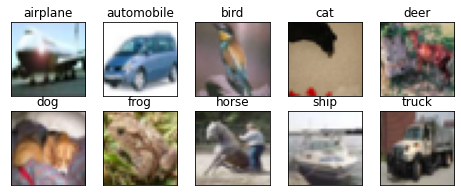

Here are a few samples AFTER TRANSFORMS APPLIED:


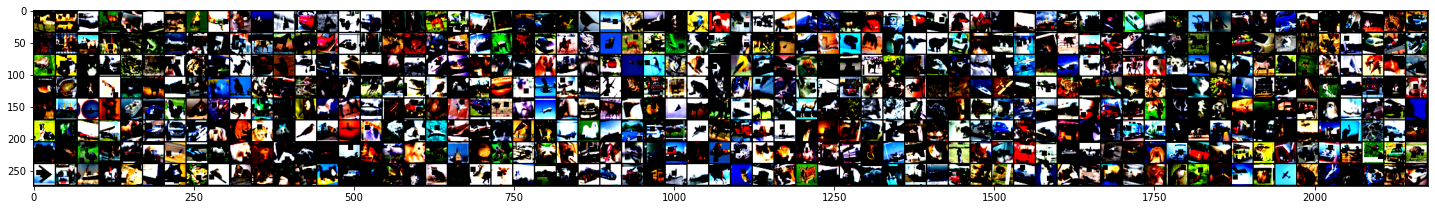

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
              ReLU-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
           Dropout-7           [-1, 32, 32, 32]               0
              ReLU-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]          13,824
      BatchNorm2d-10           [-1, 48, 32, 32]              96
          Dropout-11           [-1, 48, 32, 32]               0
             ReLU-12           [-1, 48, 32, 32]               0
        AvgPool2d-13             [-1, 48, 1, 1]               0
           Linear-14              

Loss=2.1314473152160645 Batch_id=97 Accuracy=24.01: 100%|██████████| 98/98 [00:04<00:00, 20.65it/s]



Test set: Average loss: 0.0040, Accuracy: 2721/10000 (27.21%)

validation-accuracy improved from 0 to 27.21, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-27.21.h5
EPOCH: 2
LR: 0.04233558282208588


Loss=2.0714080333709717 Batch_id=97 Accuracy=27.50: 100%|██████████| 98/98 [00:04<00:00, 22.77it/s]



Test set: Average loss: 0.0041, Accuracy: 2723/10000 (27.23%)

validation-accuracy improved from 27.21 to 27.23, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-2_L1-1_L2-0_val_acc-27.23.h5
EPOCH: 3
LR: 0.06957116564417178


Loss=2.045386791229248 Batch_id=97 Accuracy=29.00: 100%|██████████| 98/98 [00:04<00:00, 23.45it/s]



Test set: Average loss: 0.0040, Accuracy: 2919/10000 (29.19%)

validation-accuracy improved from 27.23 to 29.19, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-3_L1-1_L2-0_val_acc-29.19.h5
EPOCH: 4
LR: 0.09680674846625767


Loss=2.0425381660461426 Batch_id=97 Accuracy=29.70: 100%|██████████| 98/98 [00:04<00:00, 23.17it/s]



Test set: Average loss: 0.0039, Accuracy: 3043/10000 (30.43%)

validation-accuracy improved from 29.19 to 30.43, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-4_L1-1_L2-0_val_acc-30.43.h5
EPOCH: 5
LR: 0.12404233128834355


Loss=2.1141421794891357 Batch_id=97 Accuracy=30.21: 100%|██████████| 98/98 [00:04<00:00, 22.88it/s]



Test set: Average loss: 0.0039, Accuracy: 2993/10000 (29.93%)

EPOCH: 6
LR: 0.15091971535982815


Loss=2.077439785003662 Batch_id=97 Accuracy=30.23: 100%|██████████| 98/98 [00:04<00:00, 23.27it/s]



Test set: Average loss: 0.0040, Accuracy: 3079/10000 (30.79%)

validation-accuracy improved from 30.43 to 30.79, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-6_L1-1_L2-0_val_acc-30.79.h5
EPOCH: 7
LR: 0.14305182062298602


Loss=2.0244812965393066 Batch_id=97 Accuracy=31.56: 100%|██████████| 98/98 [00:04<00:00, 22.48it/s]



Test set: Average loss: 0.0038, Accuracy: 3409/10000 (34.09%)

validation-accuracy improved from 30.79 to 34.09, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-7_L1-1_L2-0_val_acc-34.09.h5
EPOCH: 8
LR: 0.13518392588614392


Loss=2.0159552097320557 Batch_id=97 Accuracy=32.73: 100%|██████████| 98/98 [00:04<00:00, 23.12it/s]



Test set: Average loss: 0.0038, Accuracy: 3315/10000 (33.15%)

EPOCH: 9
LR: 0.12731603114930182


Loss=1.9737426042556763 Batch_id=97 Accuracy=32.99: 100%|██████████| 98/98 [00:04<00:00, 22.61it/s]



Test set: Average loss: 0.0042, Accuracy: 3046/10000 (30.46%)

EPOCH: 10
LR: 0.11944813641245972


Loss=1.8997420072555542 Batch_id=97 Accuracy=33.85: 100%|██████████| 98/98 [00:04<00:00, 23.47it/s]



Test set: Average loss: 0.0037, Accuracy: 3513/10000 (35.13%)

validation-accuracy improved from 34.09 to 35.13, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-10_L1-1_L2-0_val_acc-35.13.h5
EPOCH: 11
LR: 0.11158024167561761


Loss=1.9875361919403076 Batch_id=97 Accuracy=34.14: 100%|██████████| 98/98 [00:04<00:00, 23.35it/s]



Test set: Average loss: 0.0036, Accuracy: 3741/10000 (37.41%)

validation-accuracy improved from 35.13 to 37.41, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-11_L1-1_L2-0_val_acc-37.41.h5
EPOCH: 12
LR: 0.10371234693877551


Loss=2.019270896911621 Batch_id=97 Accuracy=34.50: 100%|██████████| 98/98 [00:04<00:00, 22.69it/s]



Test set: Average loss: 0.0038, Accuracy: 3487/10000 (34.87%)

EPOCH: 13
LR: 0.09584445220193341


Loss=1.8942344188690186 Batch_id=97 Accuracy=34.74: 100%|██████████| 98/98 [00:04<00:00, 23.35it/s]



Test set: Average loss: 0.0038, Accuracy: 3519/10000 (35.19%)

EPOCH: 14
LR: 0.0879765574650913


Loss=1.8612499237060547 Batch_id=97 Accuracy=35.09: 100%|██████████| 98/98 [00:04<00:00, 22.53it/s]



Test set: Average loss: 0.0036, Accuracy: 3791/10000 (37.91%)

validation-accuracy improved from 37.41 to 37.91, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-14_L1-1_L2-0_val_acc-37.91.h5
EPOCH: 15
LR: 0.0801086627282492


Loss=1.9935224056243896 Batch_id=97 Accuracy=35.34: 100%|██████████| 98/98 [00:04<00:00, 22.95it/s]



Test set: Average loss: 0.0037, Accuracy: 3807/10000 (38.07%)

validation-accuracy improved from 37.91 to 38.07, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-15_L1-1_L2-0_val_acc-38.07.h5
EPOCH: 16
LR: 0.07224076799140709


Loss=1.995123267173767 Batch_id=97 Accuracy=35.61: 100%|██████████| 98/98 [00:04<00:00, 22.64it/s]



Test set: Average loss: 0.0039, Accuracy: 3421/10000 (34.21%)

EPOCH: 17
LR: 0.06437287325456499


Loss=1.9617526531219482 Batch_id=97 Accuracy=35.92: 100%|██████████| 98/98 [00:04<00:00, 23.14it/s]



Test set: Average loss: 0.0035, Accuracy: 3852/10000 (38.52%)

validation-accuracy improved from 38.07 to 38.52, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-17_L1-1_L2-0_val_acc-38.52.h5
EPOCH: 18
LR: 0.05650497851772289


Loss=1.9776537418365479 Batch_id=97 Accuracy=36.37: 100%|██████████| 98/98 [00:04<00:00, 23.19it/s]



Test set: Average loss: 0.0035, Accuracy: 3790/10000 (37.90%)

EPOCH: 19
LR: 0.048637083780880774


Loss=1.8437831401824951 Batch_id=97 Accuracy=36.74: 100%|██████████| 98/98 [00:04<00:00, 22.62it/s]



Test set: Average loss: 0.0036, Accuracy: 3796/10000 (37.96%)

EPOCH: 20
LR: 0.04076918904403867


Loss=1.8770501613616943 Batch_id=97 Accuracy=37.01: 100%|██████████| 98/98 [00:04<00:00, 23.04it/s]



Test set: Average loss: 0.0035, Accuracy: 3873/10000 (38.73%)

validation-accuracy improved from 38.52 to 38.73, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-38.73.h5
EPOCH: 21
LR: 0.03290129430719656


Loss=1.8783206939697266 Batch_id=97 Accuracy=37.26: 100%|██████████| 98/98 [00:04<00:00, 22.35it/s]



Test set: Average loss: 0.0036, Accuracy: 3777/10000 (37.77%)

EPOCH: 22
LR: 0.02503339957035447


Loss=1.8417435884475708 Batch_id=97 Accuracy=37.60: 100%|██████████| 98/98 [00:04<00:00, 23.25it/s]



Test set: Average loss: 0.0035, Accuracy: 3994/10000 (39.94%)

validation-accuracy improved from 38.73 to 39.94, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-22_L1-1_L2-0_val_acc-39.94.h5
EPOCH: 23
LR: 0.01716550483351237


Loss=1.893621802330017 Batch_id=97 Accuracy=37.94: 100%|██████████| 98/98 [00:04<00:00, 22.59it/s]



Test set: Average loss: 0.0034, Accuracy: 4012/10000 (40.12%)

validation-accuracy improved from 39.94 to 40.12, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-23_L1-1_L2-0_val_acc-40.12.h5
EPOCH: 24
LR: 0.009297610096670267


Loss=1.8284498453140259 Batch_id=97 Accuracy=38.24: 100%|██████████| 98/98 [00:04<00:00, 22.88it/s]



Test set: Average loss: 0.0034, Accuracy: 4110/10000 (41.10%)

validation-accuracy improved from 40.12 to 41.1, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-41.1.h5


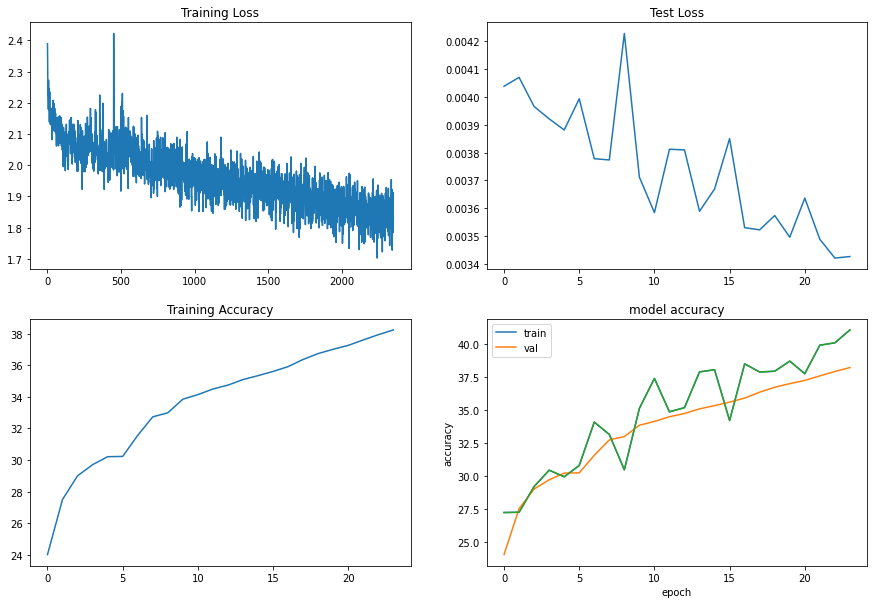

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd train --best_lr 1.51E-01 

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-41.1.h5 is loaded to get confusion matrix etc.



CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-41.1.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verifi

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


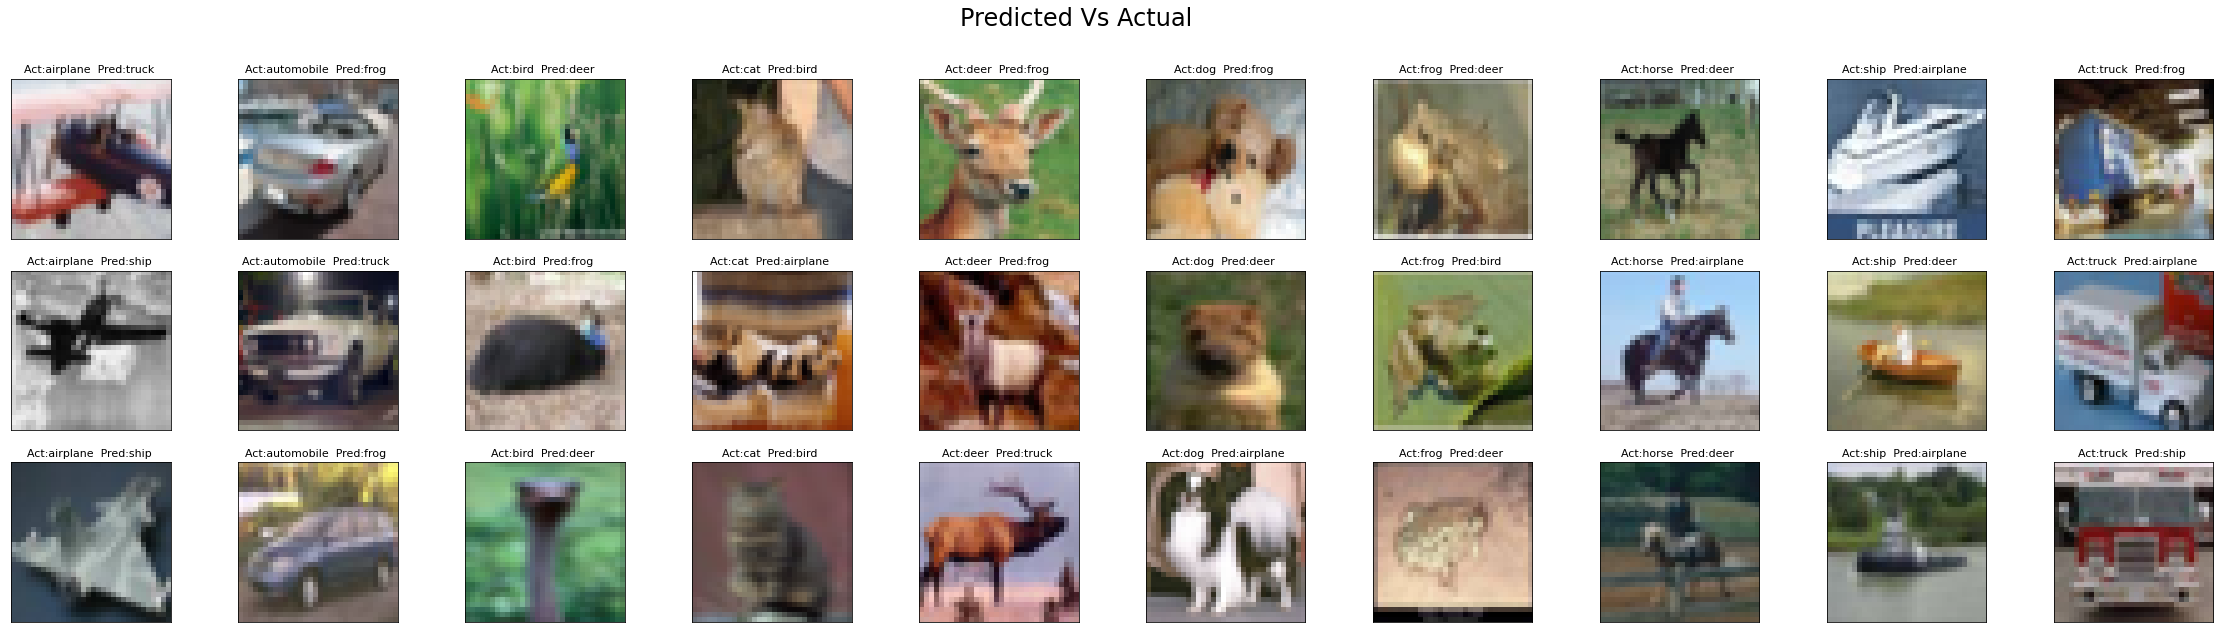

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-41.1.h5